<font color = '#7FFF00'> **In The Name Of God** </font>

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<font color = '#7FFF00'> **Data Cleaning** </font>

<font color = '#6495ED'> **Handle missing values** </font>

In [9]:
for i in df.columns:
  if df[i].isna().sum() != 0:
    print('null values in', i, 'column :', df[i].isna().sum() ) 

null values in children column : 4
null values in country column : 488
null values in agent column : 16340
null values in company column : 112593


So we have 4 columns with null values. We need to understand the context of the data to make a decision on how to handle these null values. Here is how I handled it:

In [ ]:
# run len(df.index): we can see that our dataset contains 119390 rows
# Most rows in company columns are missing -> we will drop the whole column
df = df.drop(columns = 'company')

# We can drop 4 rows containing null values from chidren column
# It will not affect our result too much 
df = df.dropna(subset = ['children'])

# For country we will fill missing values with the mode frequent value.
df['country'].fillna(df['country'].mode()[0], inplace = True)

#lastly, for agent column will will fill 9 for every null values. 
# this will represent agent ID 
df['agent'].fillna(0, inplace = True)

<font color = '#6495ED'> **Convert Columns** </font>

We can see some confusing values like TA/TO and BB, FB, HB, we will replaced it so it will be easier for us to conduct further analysis.

In [ ]:
#replace TA/TO with Undefined in distribution_channel column
df['distribution_channel'].replace("TA/TO", "Undefined", inplace = True)

#replace Undefined, BB, FB, HB, SC to its meaning. 
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'], 
                   [ 'No Meal', 'Breakfast', 'Full Board', 'Hald Board', 'No Meal'],
                   inplace = True)
#inplace = true -> directly modify the dataframe.
#inplace = false -> Creating a new df (default)

<font color = '#6495ED'> **Changing datatypes** </font>

We spot some columns still in string types, let s modify it:

In [12]:
#turn column into int data type
df['children'].astype(int)
df['agent'].astype(int)

#turn column into datetime data type
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

<font color = '#6495ED'> **Handle duplicates** </font>

We run below code to figure out the number of duplicated rows. We will remove them because it is very unlikely to to have 2 similar rows. It means we assume that there no 2 booking with similar number of people, date, channel, agent, number of requirements, and booking history.

We can just drop those duplicated columns:

In [13]:
df.duplicated().sum() # -> 32020 duplicated rows
df.drop_duplicates(inplace = True)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.000000,87366.00000,87366.000000,87366.000000,87366.000000,87366.000000
mean,0.274935,79.915207,2016.210345,26.839285,15.815786,1.005460,2.625816,1.875936,0.138681,0.010828,0.039088,0.030424,0.184053,0.271685,81.01464,0.749823,106.350448,0.084255,0.698613
std,0.446484,86.056865,0.686082,13.673468,8.834781,1.031981,2.053702,0.626475,0.455942,0.113616,0.193806,0.369208,1.732188,0.727349,109.94285,10.017441,55.002761,0.281577,0.831952
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.00000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,391.000000,5400.000000,8.000000,5.000000


<font color = '#7FFF00'> **Answers of Questions:** </font>

<font color = '#6495ED'> **Q1. There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results.** </font>

In [24]:
hotel_counts = df['hotel'].value_counts()
hotel_counts

hotel
City Hotel      53422
Resort Hotel    33944
Name: count, dtype: int64

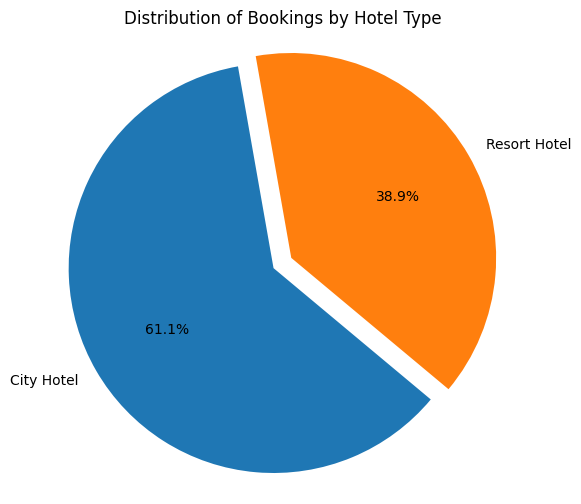

In [25]:
labels = hotel_counts.index
sizes = hotel_counts.values

plt.figure(figsize=(6, 6))
plt.pie(sizes,explode=(0.1,0) , labels=labels ,autopct='%1.1f%%',  startangle=100)
plt.axis('equal') 
plt.title('Distribution of Bookings by Hotel Type')
plt.show()


 **Analyze:**
  - We have two types of hotels, which are called city hotels and resort hotels. that the city hotel had 53422 receptions and that one type of hotel had 33942 receptions. It can be concluded that the city hotel accepts 61.1% of the passengers and most of the passengers go to this type of hotel.

<font color = '#6495ED'> **Q2.What percentage of bookings were cancelled? What type of chart do you suggest to show the results?** </font>


In [15]:
total_bookings = len(df)
cancelled_bookings = df[df['is_canceled' ] == 1].value_counts().sum()

percentage_cancelled = (cancelled_bookings / total_bookings) * 100
percentage_cancelled

27.493532953322802

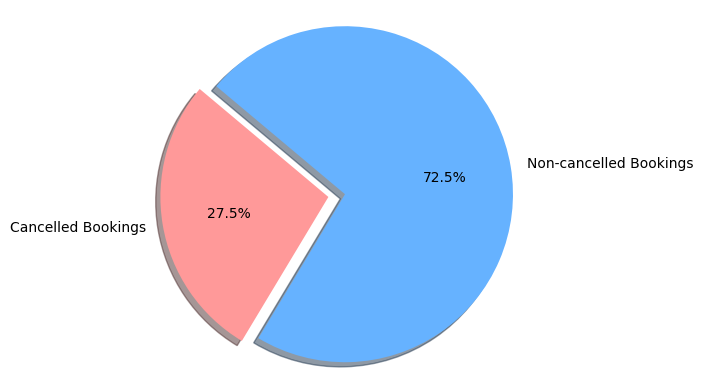

In [17]:


labels = 'Cancelled Bookings', 'Non-cancelled Bookings'
sizes = percentage_cancelled, 100 - percentage_cancelled
colors = '#FF9999', '#66B2FF'
explode = (0.1 ,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 

plt.show()

 **Analyze:**
  - 27.5% of the bookings have been canceled, which is still a relatively small percentage, but we should be concerned about what caused this because it will cause losses in the long run.
  - To visualize the results, a pie chart can be used. A pie chart could display the percentage of cancelled bookings relative to the total.

<font color = '#6495ED'> **Q3. Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results?** </font>

In [26]:
cancelled_by_hotel_type = df.groupby('hotel')['is_canceled'].mean() * 100

print("Percentage of bookings cancelled by hotel type:")
print(cancelled_by_hotel_type)

Percentage of bookings cancelled by hotel type:
hotel
City Hotel      30.034443
Resort Hotel    23.494579
Name: is_canceled, dtype: float64


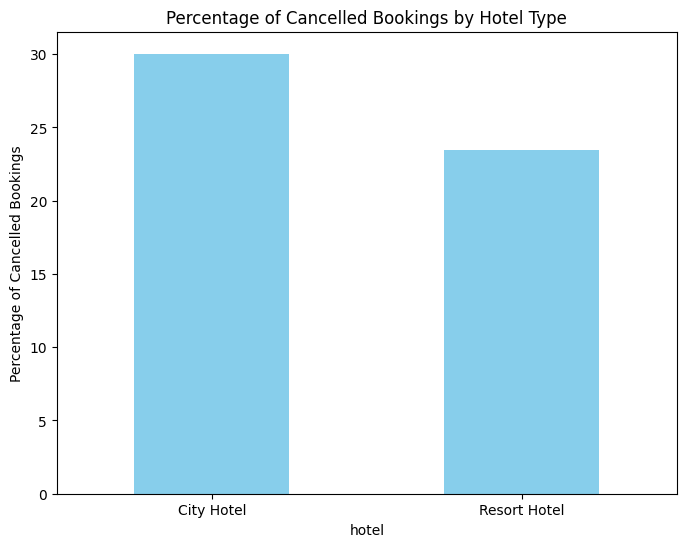

In [27]:
plt.figure(figsize=(8, 6))
cancelled_by_hotel_type.plot(kind='bar', color='skyblue')
plt.ylabel('Percentage of Cancelled Bookings')
plt.title('Percentage of Cancelled Bookings by Hotel Type')
plt.xticks(rotation=0)
plt.show()

 **Analyze:**
  - City hotel has about 7% more cancellations than Restore hotel, which seems reasonable considering the larger population of its guests.
  - To visualize the results, a grouped bar chart can be used, A grouped bar chart can compare the percentage of cancelled bookings across different hotel types more directly.

<font color = '#6495ED'> **Q4. In different years, what type of hotels were booked most and booked least? Draw a proper countplot to show the results.** </font>

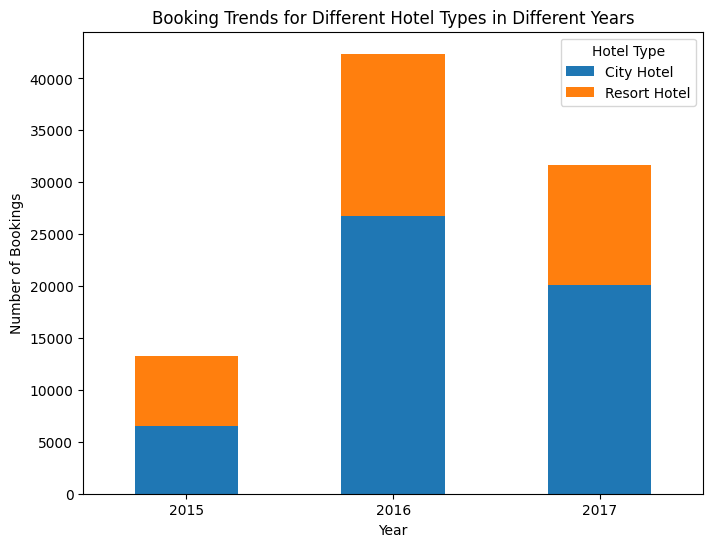

In [28]:
counts = df.groupby(['arrival_date_year' , 'hotel']).size().unstack()

counts.plot(kind='bar' , stacked=True , figsize=(8, 6) , rot=360)

plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.title('Booking Trends for Different Hotel Types in Different Years')
plt.legend(title='Hotel Type')
plt.show()

 **Analyze:**
  - As it seems, in 2016 & 2017, city hotel had the highest number of bookings, while in 2015, this case was almost the same for all types of hotels. It can be said that in the beginning, they progressed equally, but in the future, restor hotel has increased its facilities and progressed, which made it move ahead of city hotel.
  - To analyze the booking trends for different types ofvhotels in different years, we can create a countplot that shows the distribution of bookings across hotel types for each year.

<font color = '#6495ED'> **Q5. According to different hotel types, how 'adr' changes in different months?** </font>

In [45]:
df_filtered = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
df_filtered

,hotel,arrival_date_month,adr
0,City Hotel,April,117.243702
1,City Hotel,August,125.086270
2,City Hotel,December,92.843788
3,City Hotel,February,89.016419
4,City Hotel,January,85.177107
5,City Hotel,July,120.179513
6,City Hotel,June,123.916677
7,City Hotel,March,94.837862
8,City Hotel,May,127.992429
9,City Hotel,November,89.680021


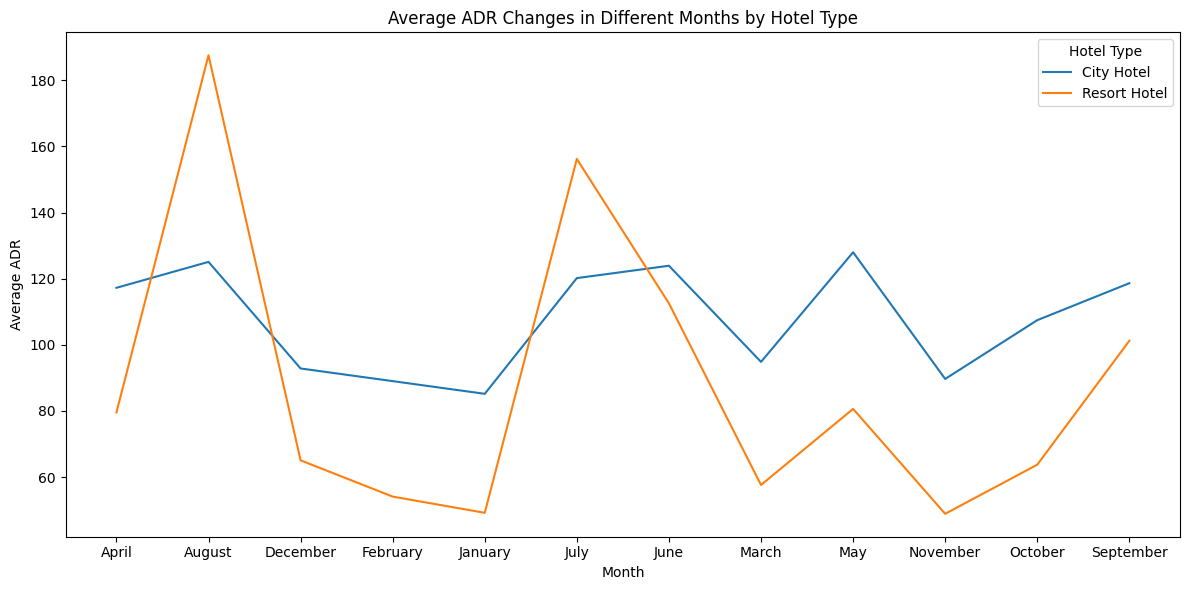

In [48]:
plt.figure(figsize=(12, 6))
for hotel_type in df_filtered['hotel'].unique():
    data = df_filtered[df_filtered['hotel'] == hotel_type]
    plt.plot(data['arrival_date_month'], data['adr'],label=hotel_type )

plt.title('Average ADR Changes in Different Months by Hotel Type')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.legend(title='Hotel Type')

plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

 **Analyze:**
  - As it can be seen, City Hotel had almost a mild and uniform trend, and except for the period before and after two months, in the rest of the months, it had more ADR than Restor Hotel. At the same time, Restaurant Restaurant has a very ups and downs chart, and in some months it has very high and in some months it has a low price. We can conclude that City Hotel has more stable conditions and can better calculate its capital and predict its future.

<font color = '#6495ED'> **Q6. Check hotel wise daily rates mean, standard deviation, median, min and max.** </font>

In [58]:
hotel_stats = df.groupby('hotel')['adr'].agg(['mean', 'std', 'median', 'min', 'max'])
hotel_stats

,mean,std,median,min,max
hotel,,,,,
City Hotel,111.103824,48.144506,105.3,0.00,5400.0
Resort Hotel,99.300606,63.883398,80.0,-6.38,508.0


<font color = '#6495ED'> **Q7. Extract the number of bookings per country and investigate that most of the guests are from which countries?** </font>

In [53]:
bookings_per_country = df['country'].value_counts()

bookings_per_country

country
PRT    27611
GBR    10328
FRA     8770
ESP     7211
DEU     5335
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

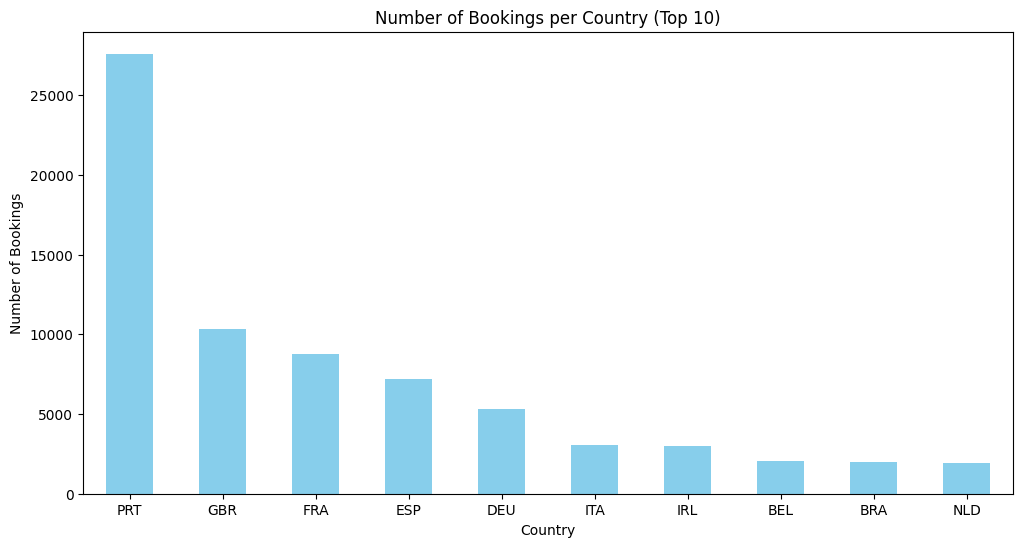

In [54]:
plt.figure(figsize=(12, 6))
bookings_per_country.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings per Country (Top 10)')
plt.xticks(rotation=360)
plt.show()

 **Analyze:**
 - Most of the guests are from portugal.

<font color = '#6495ED'> **Q8. According to the 'market_segment' most of the guests book their rooms on what channels?** </font>

In [55]:
booking_channels = df['market_segment'].value_counts()
booking_channels

market_segment
Online TA        51436
Offline TA/TO    13698
Direct           11742
Groups            4683
Corporate         4149
Complementary      699
Aviation           222
Name: count, dtype: int64

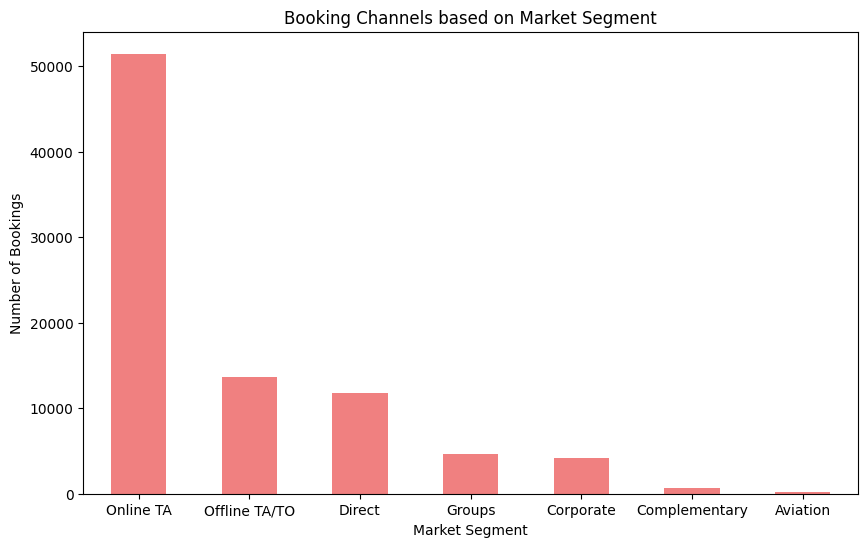

In [57]:
plt.figure(figsize=(10, 6))
booking_channels.plot(kind='bar', color='lightcoral')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.title('Booking Channels based on Market Segment')
plt.xticks(rotation=360)
plt.show()

 **Analyze:**
  - Most of the people book their rooms on online TA channels.

<font color = '#6495ED'> **Q9. What types of room are most popular for children and babies?** </font>

In [ ]:
children_babies_data = df[(df['children'] > 0) | (df['babies'] > 0)]


children_babies_data['combined_room_type'] = children_babies_data['reserved_room_type'] + '' + children_babies_data['assigned_room_type']

room_types_count = children_babies_data['combined_room_type'].value_counts()

popular_room = room_types_count.idxmax()

popular_room

 **Analyze:**
  - Room A is best suit for customers with children and babies.

<font color = '#6495ED'> **Q10. Are the guests with children & babies intrested in booking meals along with their stay duration?** </font>

In [20]:
children_and_babies_data = df[(df['children'] > 0) | (df['babies'] > 0)]


meal_booking_counts = children_and_babies_data['meal'].value_counts()


meal_booking_counts


meal
Breakfast     7414
Hald Board    1366
No Meal        240
Full Board      83
Name: count, dtype: int64

 **Analyze:**
  - Yes, they intrested in booking meals with their stay duration.